In [161]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import plotly.express as px
import datetime
import seaborn as sns

import plotly.graph_objects as go

In [34]:
plt.rcParams['font.family'] = 'Noto Sans CJK KR'

In [194]:
path = "C:/Users/NaEunSu/Downloads/"
path2 = "C:/Users/NaEunSu/critical_shoot_project/01.source/01.데이터가공/02.데이터/"
death = pd.read_excel(path + "기본통계_질병별_사망.xlsx", skiprows=4,thousands = ',')
month = pd.read_excel(path + "기본통계_질병별_월별.xlsx", skiprows=4,thousands = ',')
covid = pd.read_excel(path2+ "covid19(월별확진자).xlsx")

C:\Users\NaEunSu\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [195]:
death

,Unnamed: 0,구분,구분.1,계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,Unnamed: 16
0,NaN,1급,에볼라바이러스병,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,NaN,1급,마버그열,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,NaN,1급,라싸열,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,NaN,1급,크리미안콩고출혈열,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,NaN,1급,남아메리카출혈열,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,NaN,3급,치쿤구니야열,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
62,NaN,3급,중증열성혈소판감소증후군(SFTS),37.0,0.0,0.0,0.0,0.0,2.0,5.0,7.0,5.0,6.0,9.0,3.0,0.0,NaN
63,NaN,3급,지카바이러스감염증,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
df_death = death.iloc[:-2 , 2:-1]
df_month = month.iloc[:-2, 2:-1]

In [197]:
df_death.rename(columns={"구분.1" : "질병"}, inplace=True)
df_month.rename(columns={"구분.1" : "질병"}, inplace=True)

In [198]:
d = df_month["질병"]
dfMonth = df_month[(d == "카바페넴내성장내세균속균종(CRE) 감염증")|
                   (d == "A형간염")|
                  (d == "수두")|
                  (d == "폐렴구균 감염증")]
dfMonth

,질병,계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
17,수두,31430.0,7882.0,4017.0,2127.0,1624.0,2299.0,2263.0,2102.0,2005.0,1342.0,1767.0,2208.0,1794.0
24,A형간염,3989.0,250.0,280.0,289.0,266.0,321.0,362.0,361.0,353.0,303.0,366.0,428.0,410.0
33,폐렴구균 감염증,345.0,79.0,53.0,34.0,20.0,25.0,21.0,17.0,16.0,18.0,17.0,17.0,28.0
37,카바페넴내성장내세균속균종(CRE) 감염증,18113.0,1455.0,1306.0,1159.0,1231.0,1337.0,1623.0,1853.0,1723.0,1703.0,1680.0,1569.0,1474.0


In [199]:
d = df_death["질병"]
dfDeath = df_death[(d == "카바페넴내성장내세균속균종(CRE) 감염증")|
                   (d == "A형간염")|
                  (d == "수두")|
                  (d == "폐렴구균 감염증")]
dfDeath

,질병,계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
17,수두,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,A형간염,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33,폐렴구균 감염증,68.0,21.0,9.0,4.0,6.0,2.0,3.0,7.0,3.0,2.0,4.0,2.0,5.0
37,카바페넴내성장내세균속균종(CRE) 감염증,226.0,21.0,18.0,15.0,15.0,14.0,17.0,22.0,21.0,24.0,28.0,16.0,15.0


In [200]:
dfDeath.reset_index(drop=True,inplace=True)
dfMonth.reset_index(drop=True,inplace=True)

In [201]:
covid.iloc[0:1, :1] = "코로나"

In [202]:
covid.rename(columns={"Unnamed: 0" : "질병"}, inplace=True)
covid.rename(columns={"총합" : "계"}, inplace=True)

In [203]:
dfCovid = covid.iloc[0:1, ]

In [204]:
dfCovid

,질병,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,계
0,코로나,7,80,391,156,229,459,281,2415,1306,733,2904,10432,19393


In [215]:
df = pd.concat([dfMonth,dfCovid])
df.reset_index(drop=True, inplace=True)

In [216]:
df

,질병,계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,수두,31430.0,7882.0,4017.0,2127.0,1624.0,2299.0,2263.0,2102.0,2005.0,1342.0,1767.0,2208.0,1794.0
1,A형간염,3989.0,250.0,280.0,289.0,266.0,321.0,362.0,361.0,353.0,303.0,366.0,428.0,410.0
2,폐렴구균 감염증,345.0,79.0,53.0,34.0,20.0,25.0,21.0,17.0,16.0,18.0,17.0,17.0,28.0
3,카바페넴내성장내세균속균종(CRE) 감염증,18113.0,1455.0,1306.0,1159.0,1231.0,1337.0,1623.0,1853.0,1723.0,1703.0,1680.0,1569.0,1474.0
4,코로나,19393.0,7.0,80.0,391.0,156.0,229.0,459.0,281.0,2415.0,1306.0,733.0,2904.0,10432.0


In [217]:
df.index = df["질병"]
del df["질병"]
del df["계"]
df

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
질병,,,,,,,,,,,,
수두,7882.0,4017.0,2127.0,1624.0,2299.0,2263.0,2102.0,2005.0,1342.0,1767.0,2208.0,1794.0
A형간염,250.0,280.0,289.0,266.0,321.0,362.0,361.0,353.0,303.0,366.0,428.0,410.0
폐렴구균 감염증,79.0,53.0,34.0,20.0,25.0,21.0,17.0,16.0,18.0,17.0,17.0,28.0
카바페넴내성장내세균속균종(CRE) 감염증,1455.0,1306.0,1159.0,1231.0,1337.0,1623.0,1853.0,1723.0,1703.0,1680.0,1569.0,1474.0
코로나,7.0,80.0,391.0,156.0,229.0,459.0,281.0,2415.0,1306.0,733.0,2904.0,10432.0


In [218]:
# df = df.T
# df

In [219]:
# df["년도"] = df.index

In [220]:
df = df.T
df

질병,수두,A형간염,폐렴구균 감염증,카바페넴내성장내세균속균종(CRE) 감염증,코로나
1월,7882.0,250.0,79.0,1455.0,7.0
2월,4017.0,280.0,53.0,1306.0,80.0
3월,2127.0,289.0,34.0,1159.0,391.0
4월,1624.0,266.0,20.0,1231.0,156.0
5월,2299.0,321.0,25.0,1337.0,229.0
6월,2263.0,362.0,21.0,1623.0,459.0
7월,2102.0,361.0,17.0,1853.0,281.0
8월,2005.0,353.0,16.0,1723.0,2415.0
9월,1342.0,303.0,18.0,1703.0,1306.0
10월,1767.0,366.0,17.0,1680.0,733.0


In [222]:
# df.reset_index(inplace=True)
# df

In [223]:
# df.rename(columns={"index":"월"},inplace = True)
# df

In [224]:
# df

In [283]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = go.Figure()

for i in df.keys():
    fig.add_trace(go.Bar(
        x = months,
        y = df[i].values,
        name = i
    ))

fig.update_layout(barmode='group',
                  title_text='질병 감염자 수 비교',
                  title_font_size=20, # title text 크기
                  xaxis_tickfont_size=14, # x 축 틱의 크기
                  legend=dict( # 범례 스타일
                        x=0.03,
                        y=1.0,
                        bgcolor='rgba(255, 255, 255, 0)',
                        bordercolor='rgba(255, 255, 255, 0)'
                    )
                 )
fig.show()

In [230]:
 dfMonth

,질병,계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,수두,31430.0,7882.0,4017.0,2127.0,1624.0,2299.0,2263.0,2102.0,2005.0,1342.0,1767.0,2208.0,1794.0
1,A형간염,3989.0,250.0,280.0,289.0,266.0,321.0,362.0,361.0,353.0,303.0,366.0,428.0,410.0
2,폐렴구균 감염증,345.0,79.0,53.0,34.0,20.0,25.0,21.0,17.0,16.0,18.0,17.0,17.0,28.0
3,카바페넴내성장내세균속균종(CRE) 감염증,18113.0,1455.0,1306.0,1159.0,1231.0,1337.0,1623.0,1853.0,1723.0,1703.0,1680.0,1569.0,1474.0


In [233]:
del dfDeath["계"]

In [251]:
dfDeath.index = dfDeath.질병

In [255]:
del dfDeath["질병"]

In [259]:
dfDeath = dfDeath.T
dfDeath

질병,수두,A형간염,폐렴구균 감염증,카바페넴내성장내세균속균종(CRE) 감염증
1월,0.0,0.0,21.0,21.0
2월,0.0,0.0,9.0,18.0
3월,0.0,0.0,4.0,15.0
4월,0.0,0.0,6.0,15.0
5월,0.0,0.0,2.0,14.0
6월,0.0,0.0,3.0,17.0
7월,0.0,0.0,7.0,22.0
8월,0.0,0.0,3.0,21.0
9월,0.0,0.0,2.0,24.0
10월,0.0,0.0,4.0,28.0


In [286]:
c = [0, 16, 162, 248, 271, 282, 301, 324, 415, 466, 526, 917]

In [287]:
dfDeath["코로나"] = c
dfDeath

질병,수두,A형간염,폐렴구균 감염증,카바페넴내성장내세균속균종(CRE) 감염증,코로나
1월,0.0,0.0,21.0,21.0,0
2월,0.0,0.0,9.0,18.0,16
3월,0.0,0.0,4.0,15.0,162
4월,0.0,0.0,6.0,15.0,248
5월,0.0,0.0,2.0,14.0,271
6월,0.0,0.0,3.0,17.0,282
7월,0.0,0.0,7.0,22.0,301
8월,0.0,0.0,3.0,21.0,324
9월,0.0,0.0,2.0,24.0,415
10월,0.0,0.0,4.0,28.0,466


In [289]:
list(dfDeath.keys())

['수두', 'A형간염', '폐렴구균 감염증', '카바페넴내성장내세균속균종(CRE) 감염증', '코로나']

In [292]:
for i in dfDeath.keys():
    df[i+"사망"] = dfDeath[i]

In [293]:
df

질병,수두,A형간염,폐렴구균 감염증,카바페넴내성장내세균속균종(CRE) 감염증,코로나,수두사망,A형간염사망,폐렴구균 감염증사망,카바페넴내성장내세균속균종(CRE) 감염증사망,코로나사망
1월,7882.0,250.0,79.0,1455.0,7.0,0.0,0.0,21.0,21.0,0
2월,4017.0,280.0,53.0,1306.0,80.0,0.0,0.0,9.0,18.0,16
3월,2127.0,289.0,34.0,1159.0,391.0,0.0,0.0,4.0,15.0,162
4월,1624.0,266.0,20.0,1231.0,156.0,0.0,0.0,6.0,15.0,248
5월,2299.0,321.0,25.0,1337.0,229.0,0.0,0.0,2.0,14.0,271
6월,2263.0,362.0,21.0,1623.0,459.0,0.0,0.0,3.0,17.0,282
7월,2102.0,361.0,17.0,1853.0,281.0,0.0,0.0,7.0,22.0,301
8월,2005.0,353.0,16.0,1723.0,2415.0,0.0,0.0,3.0,21.0,324
9월,1342.0,303.0,18.0,1703.0,1306.0,0.0,0.0,2.0,24.0,415
10월,1767.0,366.0,17.0,1680.0,733.0,0.0,0.0,4.0,28.0,466


In [300]:
df.keys()

Index(['수두', 'A형간염', '폐렴구균 감염증', '카바페넴내성장내세균속균종(CRE) 감염증', '코로나', '수두사망',
       'A형간염사망', '폐렴구균 감염증사망', '카바페넴내성장내세균속균종(CRE) 감염증사망', '코로나사망'],
      dtype='object', name='질병')

In [304]:
a = [] # 질병 발생자 총 합
for i in df.keys()[:5]:
    a.append(df[i].sum())
    
b = [] # 질병 사망자 총 합
for i in df.keys()[5:]:
    b.append(df[i].sum())

In [306]:
df.keys()[:5]

Index(['수두', 'A형간염', '폐렴구균 감염증', '카바페넴내성장내세균속균종(CRE) 감염증', '코로나'], dtype='object', name='질병')

In [309]:
disName = list(df.keys()[:5])
disDeath = list(df.keys()[5:])

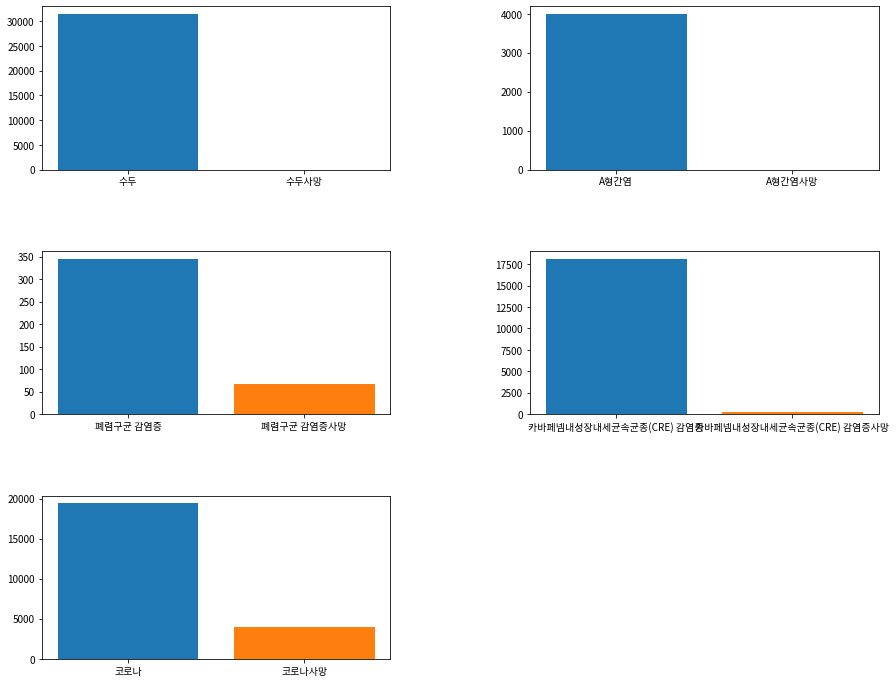

In [343]:
plt.figure(figsize=(15,12));
plt.subplots_adjust(hspace=0.5, wspace=0.4)

for i in range(5):
    plt.subplot(3,2,i+1)
    plt.bar(disName[i],a[i]);
    plt.bar(disDeath[i],b[i])